In [25]:
from PIL import Image
BASE_DIR ='core.v8i.tensorflow/train'
import pandas as pd
Df=pd.read_csv(BASE_DIR+'/_annotations.csv')

In [26]:
Df

,filename,width,height,class,xmin,ymin,xmax,ymax
0,hcgnagpur_icu_mon-401_2022_11_9_8_30_1_jpeg_jp...,800,500,HR,90,62,241,164
1,hcgnagpur_icu_mon-401_2022_11_9_8_30_1_jpeg_jp...,800,500,SBP,14,227,124,278
2,hcgnagpur_icu_mon-401_2022_11_9_8_30_1_jpeg_jp...,800,500,DBP,181,225,259,275
3,hcgnagpur_icu_mon-401_2022_11_9_8_30_1_jpeg_jp...,800,500,MAP,96,278,187,304
4,hcgnagpur_icu_mon-401_2022_11_9_8_30_1_jpeg_jp...,800,500,SPO2,68,343,243,416
...,...,...,...,...,...,...,...,...
4083,hcgnagpur_icu_mon-403_2022_10_14_5_30_30_jpeg_...,800,500,SBP,0,235,107,288
4084,hcgnagpur_icu_mon-403_2022_10_14_5_30_30_jpeg_...,800,500,DBP,165,230,244,281
4085,hcgnagpur_icu_mon-403_2022_10_14_5_30_30_jpeg_...,800,500,MAP,76,282,168,312
4086,hcgnagpur_icu_mon-403_2022_10_14_5_30_30_jpeg_...,800,500,SPO2,42,344,221,422


In [1]:
import cv2

In [28]:
import matplotlib.pyplot as plt

In [34]:
for i,Se in Df.iterrows():
    # print(Se)
    img=cv2.imread(BASE_DIR+'/'+Se['filename'])
    Cr=img[Se['ymin']:Se['ymax'],Se['xmin']:Se['xmax']]
    cv2.imwrite(f"Number_dataset/{i}.jpg",Cr)

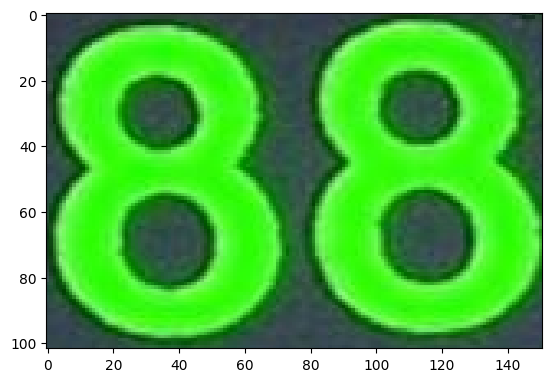

In [21]:
plt.imshow(Cr)

In [37]:
img=cv2.imread('Number_dataset/0.jpg')

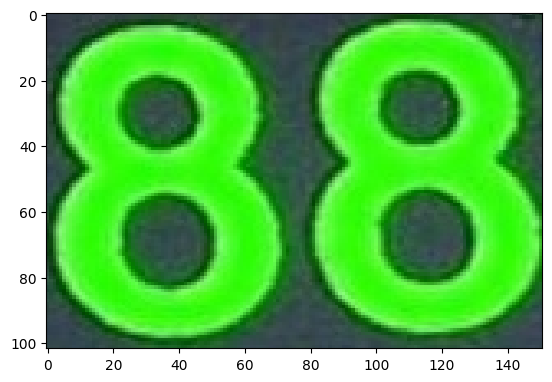

In [38]:
plt.imshow(img)

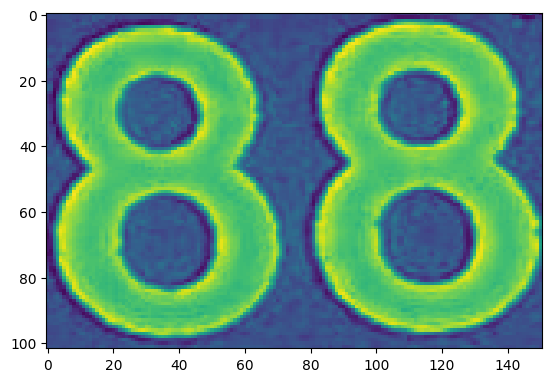

In [41]:
clahefilter = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(3,3))
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
claheCorrecttedFrame = clahefilter.apply(gray_image)
plt.imshow(claheCorrecttedFrame)

In [76]:
hs = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
thresh,im = cv2.threshold(hs[:,:,2], 100, 185, cv2.THRESH_OTSU)
contours1, hierarchy  = cv2.findContours(im, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

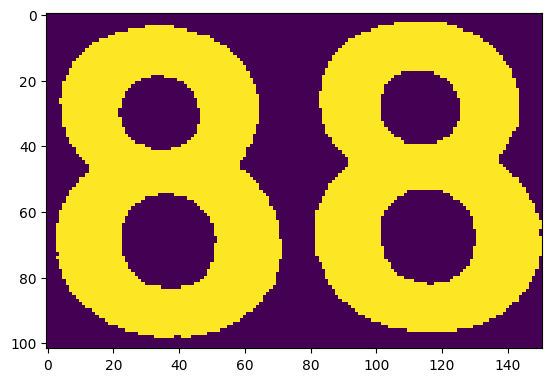

In [77]:
plt.imshow(im)

In [78]:
thresh

168.0

In [79]:
im_88=img.copy()
cv2.drawContours(im_88, contours1, -1, (255,0,75), 2)

array([[[55, 64, 77],
        [56, 65, 78],
        [56, 64, 77],
        ...,
        [43, 69, 56],
        [43, 69, 55],
        [23, 49, 35]],

       [[54, 63, 76],
        [54, 63, 76],
        [55, 63, 76],
        ...,
        [26, 51, 41],
        [44, 70, 57],
        [44, 70, 56]],

       [[49, 57, 70],
        [49, 57, 70],
        [50, 58, 71],
        ...,
        [48, 71, 63],
        [53, 77, 67],
        [48, 72, 62]],

       ...,

       [[51, 69, 76],
        [51, 69, 76],
        [51, 69, 76],
        ...,
        [53, 66, 80],
        [54, 67, 81],
        [55, 68, 82]],

       [[50, 69, 74],
        [51, 70, 75],
        [52, 71, 76],
        ...,
        [54, 70, 82],
        [54, 70, 82],
        [53, 69, 81]],

       [[52, 71, 74],
        [53, 72, 75],
        [54, 73, 76],
        ...,
        [59, 75, 87],
        [57, 73, 85],
        [53, 70, 79]]], dtype=uint8)

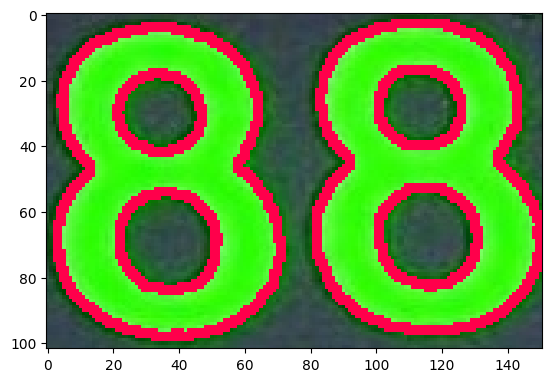

In [80]:
plt.imshow(im_88)

In [85]:
hierarchy

array([[[ 1, -1, -1, -1],
        [ 2,  0, -1, -1],
        [ 3,  1, -1, -1],
        [ 4,  2, -1, -1],
        [ 5,  3, -1, -1],
        [-1,  4, -1, -1]]], dtype=int32)

In [84]:
contours1

(array([[[33, 55]],
 
        [[34, 54]],
 
        [[38, 54]],
 
        [[39, 55]],
 
        [[42, 55]],
 
        [[43, 56]],
 
        [[44, 56]],
 
        [[50, 62]],
 
        [[50, 63]],
 
        [[51, 64]],
 
        [[51, 67]],
 
        [[52, 68]],
 
        [[52, 69]],
 
        [[51, 70]],
 
        [[51, 75]],
 
        [[50, 76]],
 
        [[50, 77]],
 
        [[49, 78]],
 
        [[49, 79]],
 
        [[46, 82]],
 
        [[45, 82]],
 
        [[44, 83]],
 
        [[41, 83]],
 
        [[40, 84]],
 
        [[35, 84]],
 
        [[34, 83]],
 
        [[30, 83]],
 
        [[24, 77]],
 
        [[24, 76]],
 
        [[23, 75]],
 
        [[23, 74]],
 
        [[22, 73]],
 
        [[22, 64]],
 
        [[23, 63]],
 
        [[23, 62]],
 
        [[24, 61]],
 
        [[24, 60]],
 
        [[27, 57]],
 
        [[28, 57]],
 
        [[30, 55]]], dtype=int32),
 array([[[110,  53]],
 
        [[120,  53]],
 
        [[121,  54]],
 
        [[122,  54]],
 
        [[1

In [49]:
%pip install scikit-image

  Using cached lazy_loader-0.3-py3-none-any.whl.metadata (4.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 10.4 MB/s eta 0:00:0000:0100:01
Using cached lazy_loader-0.3-py3-none-any.whl (9.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 8.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [95]:
from skimage import measure
import numpy as np
def create_mask(image):
    gray = cv2.cvtColor( image, cv2.COLOR_BGR2GRAY )
    # blurred = cv2.GaussianBlur( gray, (9,9), 0 )
    _,thresh_img = cv2.threshold( gray, 100, 255, cv2.THRESH_BINARY)
    # thresh_img = cv2.erode( thresh_img, None, iterations=2 )
    # thresh_img  = cv2.dilate( thresh_img, None, iterations=4 )
    # perform a connected component analysis on the thresholded image,
    # then initialize a mask to store only the "large" components
    labels = measure.label( thresh_img, background=0 )
    mask = np.zeros( thresh_img.shape, dtype="uint8" )
    # loop over the unique components
    for label in np.unique( labels ):
        # if this is the background label, ignore it
        if label == 0:
            continue
        # otherwise, construct the label mask and count the
        # number of pixels
        labelMask = np.zeros( thresh_img.shape, dtype="uint8" )
        labelMask[labels == label] = 255
        numPixels = cv2.countNonZero( labelMask )
        print(label)
        # cv2.imshow('w',labelMask)
        # if the number of pixels in the component is sufficiently
        # large, then add it to our mask of "large blobs"
        if numPixels > 300:
            mask = cv2.add( mask, labelMask )
    return mask

1
2
3


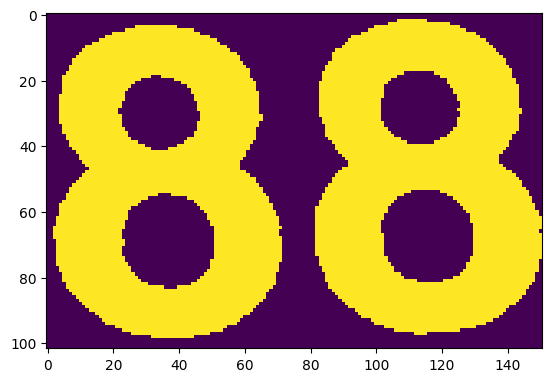

In [96]:
plt.imshow(create_mask(img))